<a href="https://colab.research.google.com/github/Stone2025/QiuLabResearchInternship/blob/main/GeneticSimulation/MendelianGeneticsWithNumpyArrays_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpy Arrays and Diploid Populations
Suppose we have a gene that controls likelihood of developing albinoism. Further, suppose there are  two version the gene, 0  and 1.  
Each person has two copies of the each gene, one from the mother and one from the father. A person in could be represented by a pair [0,0] , [1,1] , [1,0] , [0,1].  

We'll create a population of people. We'll represent each person with one of the pairs given above.

> Add blockquote






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
pop = np.zeros((10,2))   #create a 0 matrix.
pop
#What is the array composed of??

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
##When writing for loops you often what to loop through rows. The attribute .shape helps with this.
print(pop.shape)
print(pop.shape[0])  #for i in range(pop.shape[0]):   print(pop[i,0])
print(pop.shape[1])

(10, 2)
10
2


In [ ]:
newGen = np.zeros((10,2))
pop[0,1] = 3        #change an entry
pop[1,]  = [1,0]   #change the first row
a =pop[1,]
b = pop[0,]

newGen[3,0] = np.random.choice(a,1)[0]
newGen[3,1]= np.random.choice(b,1)[0]
newGen

<class 'numpy.ndarray'>


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 3.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#Assignment
In this simulation,  we will evolve a diploid population where each member is represented by two alleles, one from each parent.  

1. Initial Pop: Your initial population will be represented by  homozygous (both alleles are the same) gene pairs    [1,1]  and [0,0]  
2. Children: A child is born from a given population by a two step process:
  
  a. randomly choose 2 distinct parents from a population.  
    E.g. [0,1]    [1,1]  
  b. Then, randomly select one allele from each parent   
    e.g. parent 1 =[0 ,1]  randomly select 1.parent2 =[0,0]  randomly select 0.  then the child is [1, 0]
    c.add each child to a newGen array.

3. Statistics:  With each generation you want to keep a count of genotypes  "hom0"[0,0]  , "hom1" [1,1], "het" [1,0] or [0,1] .  You'll build a numpy array, adding a row with each generation.
  a. Note that [0,1] ~ [1,0]

4. Write a method called mendel:
  a. input: pop_size and gens.Output
  b. output : a pandas DataFrame - Convert your np.array into a pandas DataFrame.  






In [ ]:
def pop_generator(pop_size):
  rng = np.random.default_rng()
  pop = np.zeros((pop_size, 2), dtype = int)
  for row in range(pop_size):
    num = rng.binomial(1, .5, 1)
    if num == 1:
      pop[row] = [1, 1]
    else:
      pop[row] = [0, 0]
  return pop

In [ ]:
def mendel(pop_size, gens):
  rng = np.random.default_rng()
  ini_pop = pop_generator(pop_size)
  hom_0 = []
  hom_1 = []
  hete = []

  gen_pop = [] # Has all generations
  gen_pop.append(np.array(ini_pop).tolist()) #adds the intial population
  for i in range(gens):
    newGen = [] # Sperates by generation
    hom0 = 0
    hom1 = 0
    het = 0
    for k in range(pop_size):
        parents = rng.choice(gen_pop[i], 2, replace = False) #Chooses two parents
        allele_1 = rng.choice(parents[0], 1)
        allele_2 = rng.choice(parents[1], 1)
        child = []
        child.append(allele_1[0])
        child.append(allele_2[0])
        if child == [0, 0]:
          hom0+=1
        elif child == [1, 1]:
          hom1+=1
        else:
          het+=1
        newGen.append(child) #adds child to generation
    gen_pop.append(newGen) #adds
    hom_0.append(hom0)
    hom_1.append(hom1)
    hete.append(het)

  data = {"Generation" : np.arange(1, gens +1), "hom0" : hom_0 , "hom1": hom_1, "het" : hete}
  data = pd.DataFrame(data)
  print(pd.DataFrame(gen_pop))     #Use this to see the whole gen table
  return data

mendel(2, 2)

,Generation,hom0,hom1,het
0,1,2,0,0
1,2,2,0,0


In [ ]:
stats = np.array([50,50,0])  #inital statistics
stats = np.vstack((stats,[25,25,50]))  #for each gen add a row.

stats = np.column_stack((np.arange(0,stats.shape[0]),stats))  ## add a generations column   T

stats

array([[ 0, 50, 50,  0],
       [ 1, 25, 20, 10]])

In [ ]:

df = pd.DataFrame(stats)   ## convert your np array into a pd DataFrame
df.columns= ["Gen","Hom0", "Hom1","Inter"]
df

,Gen,Hom0,Hom1,Inter
0,0,50,50,0
1,1,25,20,10


<Axes: xlabel='Gen', ylabel='True1'>

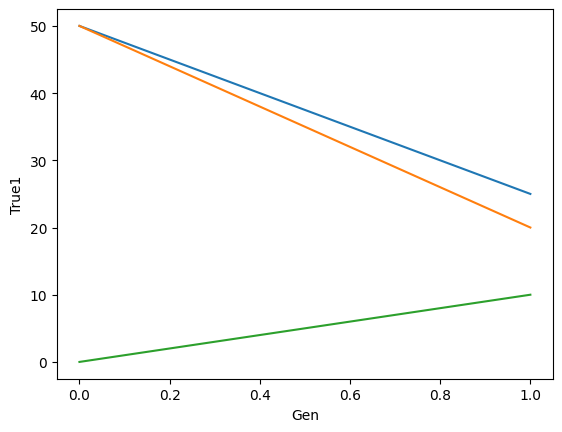

In [ ]:
sns.lineplot(x = df["Gen"] , y = df["True1"])#.set(title=.....)
sns.lineplot(x = df["Gen"] , y = df["True0"])
sns.lineplot(x = df["Gen"] , y = df["Inter"])
